<h1>Part 1: Loading the data </h1>

In [1]:
import numpy as np
import os
from tqdm import tqdm
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

def rgb2gray(rgb):
 r, g, b = rgb[:, :, :, 0], rgb[:, :, :,1], rgb[:, :, :, 2]
 gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
 return gray

X_train = []
base_path = "CIFAR10/train/"
folders = os.listdir("CIFAR10/train/")
print(os.listdir("CIFAR10/train/"))

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [2]:
for i in range(4):
    image_names = os.listdir(base_path + folders[i])
    for image_name in tqdm(image_names):
        X_train.append(mpimg.imread(base_path + folders[i] + "/" + image_name))
x_train = np.array(X_train)

100%|████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:01<00:00, 3227.89it/s]


In [3]:
X_test = []
base_path = "CIFAR10/test/"
folders = os.listdir("CIFAR10/test/")
print(os.listdir("CIFAR10/test/"))

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [4]:
for i in range(4):
    image_names = os.listdir(base_path + folders[i])
    for image_name in tqdm(image_names):
        X_test.append(mpimg.imread(base_path + folders[i] + "/" + image_name))
x_test = np.array(X_test)

100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 3321.85it/s]


In [5]:
y_train = []
base_path = "CIFAR10/train/"
folders = os.listdir("CIFAR10/train/")
for i in range(4):
    image_names = os.listdir(base_path + folders[i])
    labels = [0,0,0,0]
    labels[i] = 1
    for image_name in tqdm(image_names):
        y_train.append(labels)
y_train = np.array(y_train)

100%|█████████████████████████████████████████████████████████████████████████| 5000/5000 [00:00<00:00, 2505857.33it/s]


In [6]:
y_test = []
base_path = "CIFAR10/test/"
folders = os.listdir("CIFAR10/test/")
for i in range(4):
    image_names = os.listdir(base_path + folders[i])
    labels = [0,0,0,0]
    labels[i] = 1
    for image_name in tqdm(image_names):
        y_test.append(labels)
y_test = np.array(y_test)

100%|██████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<?, ?it/s]


In [7]:
print(f"y_train shape:{y_train.shape}\ny_test shape:{y_test.shape}")

y_train shape:(20000, 4)
y_test shape:(4000, 4)


In [8]:
print(f"x_train shape:{len(x_train)}\nx_test shape:{len(X_test)}")

x_train shape:20000
x_test shape:4000


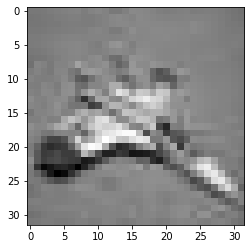

In [9]:
x_train_grayscale = rgb2gray(x_train)
x_test_grayscale = rgb2gray(x_test)
imgplot = plt.imshow(x_train_grayscale[1], cmap=plt.get_cmap('gray'))

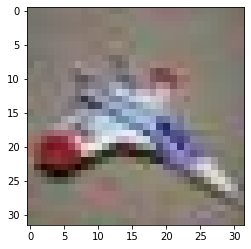

In [10]:
imgplot = plt.imshow(x_train[1])

Normalizing the images and making all the pixels fit in a [1...1024] array

In [11]:
x_train_grayscale_normalized =  x_train_grayscale/255
x_test_grayscale_normalized = x_test_grayscale/255
train_images = []
test_images = []
x_train_grayscale_normalized = x_train_grayscale_normalized.reshape(-1, 1024)
x_test_grayscale_normalized = x_test_grayscale_normalized.reshape(-1, 1024)
for i in range(20000):
    image = np.zeros((1024, 1))
    for j in range(1024):
        image[j, 0] = x_train_grayscale_normalized[i, j]
    train_images.append(image) 
for i in range(4000):
    image = np.zeros((1024, 1))
    for j in range(1024):
        image[j, 0] = x_test_grayscale_normalized[i, j]
    test_images.append(image)
print(len(train_images))
print(len(test_images))

20000
4000


Shuffling the images and their labels. Since our labels are in a different array we use a rather different shuffle from a library called sklearn.utils. This shuffle alows us to shuffle two arrays at the same time.

In [12]:
train_images,y_train = shuffle(train_images, y_train)
test_images,y_test = shuffle(test_images, y_test)

<h1> Part 2: Feedforwarding </h1>
in this part we will implement the feed forwarding algorithm for our learning neurons. We use the sigmoid activation function.

In [13]:
W1 = np.random.normal(size=(16, 1024))
W2 = np.random.normal(size=(16, 16))
W3 = np.random.normal(size=(4, 16))

b1 = np.zeros((16, 1))
b2 = np.zeros((16, 1))
b3 = np.zeros((4, 1))

In [14]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_deriv(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [15]:
number_of_correct_estimations = 0

for i in range(200):
    a0 = train_images[i]
    a1 = sigmoid(W1 @ a0 + b1)
    a2 = sigmoid(W2 @ a1 + b2)
    a3 = sigmoid(W3 @ a2 + b3)
    
    predicted_number = np.where(a3 == np.amax(a3))
    real_number = np.where(y_train[i] == np.amax(y_train[i]))
    
    try: 
        if predicted_number[0] == real_number[0]:
            number_of_correct_estimations += 1
    except:
        pass
print(f"Accuracy: {number_of_correct_estimations / 100}")

Accuracy: 0.52


<h1> Part3: Backpropegation </h1>
in this part we will implement the backpropegation algorithm.

In [28]:
batch_size = 16
learning_rate = 0.3
number_of_epochs = 10

In [17]:
%%time
total_costs = []
W1 = np.random.normal(size=(16, 1024))
W2 = np.random.normal(size=(16, 16))
W3 = np.random.normal(size=(4, 16))

b1 = np.zeros((16, 1))
b2 = np.zeros((16, 1))
b3 = np.zeros((4, 1))

for epoch in range(number_of_epochs):
    batches = [train_images[x:x+batch_size] for x in range(0, 200, batch_size)]
    for batch in batches:
        grad_W1 = np.zeros((16, 1024))
        grad_W2 = np.zeros((16, 16))
        grad_W3 = np.zeros((4, 16))
        
        grad_b1 = np.zeros((16, 1))
        grad_b2 = np.zeros((16, 1))
        grad_b3 = np.zeros((4, 1))
        
        cout = 0
        for image in batch:
            label = np.zeros((4, 1))
            for i in range(4):
                label[i, 0] = y_train[cout][i]
            cout += 1
            a1 = sigmoid(W1 @ image + b1)
            a2 = sigmoid(W2 @ a1 + b2)
            a3 = sigmoid(W3 @ a2 + b3)
            
            # ---- Last layer
            # weight
            for j in range(grad_W3.shape[0]):
                for k in range(grad_W3.shape[1]):
                    grad_W3[j, k] += 2 * (a3[j, 0] - label[j, 0]) * a3[j, 0] * (1 - a3[j, 0]) * a2[k, 0]
            # bias
            for j in range(grad_b3.shape[0]):
                    grad_b3[j, 0] += 2 * (a3[j, 0] - label[j, 0]) * a3[j, 0] * (1 - a3[j, 0])
            
            # ---- 3rd layer
            # activation
            delta_3 = np.zeros((16, 1))
            for k in range(16):
                for j in range(4):
                    delta_3[k, 0] += 2 * (a3[j, 0] - label[j, 0]) * a3[j, 0] * (1 - a3[j, 0]) * W3[j, k]
            
            # weight
            for k in range(grad_W2.shape[0]):
                for m in range(grad_W2.shape[1]):
                    grad_W2[k, m] += delta_3[k, 0] * a2[k,0] * (1 - a2[k, 0]) * a1[m, 0]
            
            # bias
            for k in range(grad_b2.shape[0]):
                    grad_b2[k, 0] += delta_3[k, 0] * a2[k, 0] * (1 - a2[k, 0])
                    
            # ---- 2nd layer
            # activation
            delta_2 = np.zeros((16, 1))
            for m in range(16):
                for k in range(16):
                    delta_2[m, 0] += delta_3[k, 0] * a2[k, 0] * (1 - a2[k, 0]) * W2[k, m]
            
            # weight
            for m in range(grad_W1.shape[0]):
                for v in range(grad_W1.shape[1]):
                    grad_W1[m, v] += delta_2[m, 0] * a1[m,0] * (1 - a1[m, 0]) * image[v, 0]
                    
            # bias
            for m in range(grad_b1.shape[0]):
                    grad_b1[m, 0] += delta_2[m, 0] * a1[m, 0] * (1 - a1[m, 0])
                    
        W3 = W3 - (learning_rate * (grad_W3 / batch_size))
        W2 = W2 - (learning_rate * (grad_W2 / batch_size))
        W1 = W1 - (learning_rate * (grad_W1 / batch_size))
        
        b3 = b3 - (learning_rate * (grad_b3 / batch_size))
        b2 = b2 - (learning_rate * (grad_b2 / batch_size))
        b1 = b1 - (learning_rate * (grad_b1 / batch_size))
    
    # calculate cost average per epoch
    cost = 0
    counter = 0
    for train_data in train_images[:200]:
        a0 = train_data
        a1 = sigmoid(W1 @ a0 + b1)
        a2 = sigmoid(W2 @ a1 + b2)
        a3 = sigmoid(W3 @ a2 + b3)
        
        for j in range(4):
            cost += np.power((a3[j, 0] - y_train[counter][j]), 2)
        counter += 1
            
    cost /= 200
    total_costs.append(cost)

Wall time: 1min


As we can see the time we waited for Backpropagation without Vectorization is aproximately 1 minute long.

Accuracy: 0.52


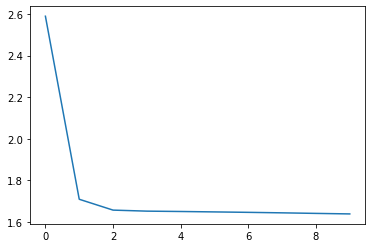

In [18]:
epoch_size = [x for x in range(number_of_epochs)]
plt.plot(epoch_size, total_costs)

for i in range(200):
    a0 = train_images[i]
    a1 = sigmoid(W1 @ a0 + b1)
    a2 = sigmoid(W2 @ a1 + b2)
    a3 = sigmoid(W3 @ a2 + b3)
    
    predicted_number = np.where(a3 == np.amax(a3))
    real_number = np.where(y_train[i] == np.amax(y_train[i]))
    
    try:
        if predicted_number == real_number:
            number_of_correct_estimations += 1
    except:
        pass
        
print(f"Accuracy: {number_of_correct_estimations / 100}")

This graph shows that which each epoch our neurons learn more and the loss gets lower.

<h1> Part 4: Vectorization </h1>
    The time that we had to wait for our Backpropagation was too much. We can drastically lower the time we need to wait with vectorizing our for loops and implementing them using matrix multiplications.

In [29]:
%%time

W1 = np.random.normal(size=(16, 1024))
W2 = np.random.normal(size=(16, 16))
W3 = np.random.normal(size=(4, 16))

b1 = np.zeros((16, 1))
b2 = np.zeros((16, 1))
b3 = np.zeros((4, 1))

total_costs = []
batches = [train_images[x:x+batch_size] for x in range(0, 200, batch_size)]
for epoch in range(number_of_epochs):
    for batch in batches:
        grad_W1 = np.zeros((16, 1024))
        grad_W2 = np.zeros((16, 16))
        grad_W3 = np.zeros((4, 16))
        
        grad_b1 = np.zeros((16, 1))
        grad_b2 = np.zeros((16, 1))
        grad_b3 = np.zeros((4, 1))
        
        cout = 0
        for image in batch:
            label = np.zeros((4, 1))
            for i in range(4):
                label[i, 0] = y_train[cout][i]
            
            a0 = image
            #print(a0.shape)
            a1 = sigmoid(W1 @ a0 + b1)
            #print(a1.shape)
            a2 = sigmoid(W2 @ a1 + b2)
            #print(a2.shape)
            a3 = sigmoid(W3 @ a2 + b3)
            #print(a3.shape)
        
            #print(a0)
            #print(a1)
            #print(a2)
            #print(a3)
            #print(label)
        
            cout += 1
            
            # ---- Last layer
            # weight
            #print((a3 - label).shape)
            grad_W3 += (2 * (a3 - label) * a3 * (1 - a3)) @ np.transpose(a2)
            #print(grad_W3)
            
            # bias
            grad_b3 += 2 * (a3 - label) * a3 * (1 - a3)
            
            # ---- 3rd layer
            # activation
            delta_3 = np.zeros((16, 1))
            delta_3 += np.transpose(W3) @ (2 *(a3 - label) * a3 * (1 - a3))
            #print(f"delta_3{delta_3}")
            
            # weight
            grad_W2 += (a2 * (1 - a2) * delta_3) @ np.transpose(a1)
            
            # bias
            grad_b2 += delta_3 * a2 * (1 - a2)
                    
            # ---- 2nd layer
            # activation
            delta_2 = np.zeros((16, 1))
            delta_2 += np.transpose(W2) @ delta_3 * a2 * (1 - a2)
            
            # weight
            grad_W1 += (delta_2 * a1 * (1 - a1)) @ np.transpose(a0)
                    
            # bias
            grad_b1 += delta_2 * a1 * (1 - a1)
        
        W3 = W3 - (learning_rate * (grad_W3 / batch_size))
        W2 = W2 - (learning_rate * (grad_W2 / batch_size))
        W1 = W1 - (learning_rate * (grad_W1 / batch_size))
        
        b3 = b3 - (learning_rate * (grad_b3 / batch_size))
        b2 = b2 - (learning_rate * (grad_b2 / batch_size))
        b1 = b1 - (learning_rate * (grad_b1 / batch_size))
    
    # calculate cost average per epoch
    cost = 0
    counter = 0
    for train_data in train_images[:200]:
        a0 = train_data
        a1 = sigmoid(W1 @ a0 + b1)
        a2 = sigmoid(W2 @ a1 + b2)
        a3 = sigmoid(W3 @ a2 + b3)
        for j in range(4):
            cost += np.power((a3[j, 0] - y_train[counter][j]), 2)
            
    cost /= 200
    total_costs.append(cost) 

Wall time: 915 ms


As we can see the time we need to wait is less than 1 second.

Accuracy: 0.52


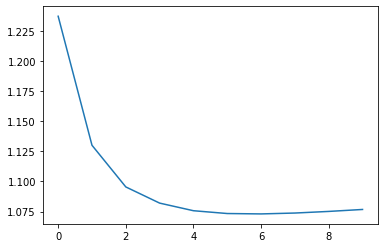

In [30]:
epoch_size = [x for x in range(number_of_epochs)]
plt.plot(epoch_size, total_costs)

for i in range(200):
    a0 = train_images[i]
    a1 = sigmoid(W1 @ a0 + b1)
    a2 = sigmoid(W2 @ a1 + b2)
    a3 = sigmoid(W3 @ a2 + b3)
    
    predicted_number = np.where(a3 == np.amax(a3))
    real_number = np.where(y_train[i] == np.amax(y_train[i]))
    
    try:
        if predicted_number == real_number:
            number_of_correct_estimations += 1
    except:
        pass
        
print(f"Accuracy: {number_of_correct_estimations / 100}")

The graph is like Backpropagation

<h1> Part 5: Testing the whole images </h1>
We will now begin to test the whole images and see what the accuracy looks like

In [31]:
batch_size = 16
learning_rate = 0.3
number_of_epochs = 40

In [36]:
%%time

W1 = np.random.normal(size=(16, 1024))
W2 = np.random.normal(size=(16, 16))
W3 = np.random.normal(size=(4, 16))

b1 = np.zeros((16, 1))
b2 = np.zeros((16, 1))
b3 = np.zeros((4, 1))

total_costs = []
batches = [train_images[x:x+batch_size] for x in range(0, 8000, batch_size)]
for epoch in range(number_of_epochs):
    for batch in batches:
        grad_W1 = np.zeros((16, 1024))
        grad_W2 = np.zeros((16, 16))
        grad_W3 = np.zeros((4, 16))
        
        grad_b1 = np.zeros((16, 1))
        grad_b2 = np.zeros((16, 1))
        grad_b3 = np.zeros((4, 1))
        
        cout = 0
        for image in batch:
            label = np.zeros((4, 1))
            for i in range(4):
                label[i, 0] = y_train[cout][i]
            
            a0 = image
            #print(a0.shape)
            a1 = sigmoid(W1 @ a0 + b1)
            #print(a1.shape)
            a2 = sigmoid(W2 @ a1 + b2)
            #print(a2.shape)
            a3 = sigmoid(W3 @ a2 + b3)
            #print(a3.shape)
        
            #print(a0)
            #print(a1)
            #print(a2)
            #print(a3)
            #print(label)
        
            cout += 1
            
            # ---- Last layer
            # weight
            #print((a3 - label).shape)
            grad_W3 += (2 * (a3 - label) * a3 * (1 - a3)) @ np.transpose(a2)
            #print(grad_W3)
            
            # bias
            grad_b3 += 2 * (a3 - label) * a3 * (1 - a3)
            
            # ---- 3rd layer
            # activation
            delta_3 = np.zeros((16, 1))
            delta_3 += np.transpose(W3) @ (2 *(a3 - label) * a3 * (1 - a3))
            #print(f"delta_3{delta_3}")
            
            # weight
            grad_W2 += (a2 * (1 - a2) * delta_3) @ np.transpose(a1)
            
            # bias
            grad_b2 += delta_3 * a2 * (1 - a2)
                    
            # ---- 2nd layer
            # activation
            delta_2 = np.zeros((16, 1))
            delta_2 += np.transpose(W2) @ delta_3 * a2 * (1 - a2)
            
            # weight
            grad_W1 += (delta_2 * a1 * (1 - a1)) @ np.transpose(a0)
                    
            # bias
            grad_b1 += delta_2 * a1 * (1 - a1)
        
        W3 = W3 - (learning_rate * (grad_W3 / batch_size))
        W2 = W2 - (learning_rate * (grad_W2 / batch_size))
        W1 = W1 - (learning_rate * (grad_W1 / batch_size))
        
        b3 = b3 - (learning_rate * (grad_b3 / batch_size))
        b2 = b2 - (learning_rate * (grad_b2 / batch_size))
        b1 = b1 - (learning_rate * (grad_b1 / batch_size))
    
    # calculate cost average per epoch
    cost = 0
    counter = 0
    for train_data in train_images[:8000]:
        a0 = train_data
        a1 = sigmoid(W1 @ a0 + b1)
        a2 = sigmoid(W2 @ a1 + b2)
        a3 = sigmoid(W3 @ a2 + b3)
        for j in range(4):
            cost += np.power((a3[j, 0] - y_train[counter][j]), 2)
            
    cost /= 8000
    total_costs.append(cost) 

Wall time: 2min 17s


Accuracy: 0.52


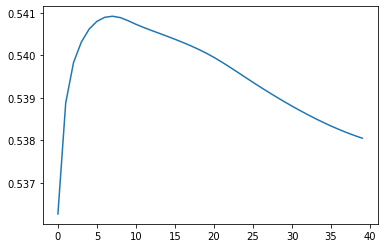

In [37]:
epoch_size = [x for x in range(number_of_epochs)]
plt.plot(epoch_size, total_costs)

for i in range(8000):
    a0 = train_images[i]
    a1 = sigmoid(W1 @ a0 + b1)
    a2 = sigmoid(W2 @ a1 + b2)
    a3 = sigmoid(W3 @ a2 + b3)
    
    predicted_number = np.where(a3 == np.amax(a3))
    real_number = np.where(y_train[i] == np.amax(y_train[i]))
    
    try:
        if predicted_number == real_number:
            number_of_correct_estimations += 1
    except:
        pass
        
print(f"Accuracy: {number_of_correct_estimations / 100}")

The accuracy is 52 percent which is expected. The graph though is very intriguing and shows how big of a loss we have once we start learning the images but as the epoch increases it gets lower and lower.